# Notebook 01: Data Acquisition and Exploratory Data Analysis

## CECL Credit Risk Modeling for Agricultural Loan Portfolio

---

**Author:** Prabhu  

---

### Objective

This notebook performs the initial data acquisition and exploratory data analysis (EDA) for our CECL-style credit risk modeling project. We will:

1. Load the Lending Club loan dataset from Zenodo
2. Understand the data structure and key variables
3. Clean and preprocess the data
4. Perform comprehensive EDA including default rate analysis
5. Save the cleaned dataset for subsequent modeling

### Dataset

- **Source:** Zenodo (cleaned Lending Club data)
- **Size:** ~1.3M+ loans
- **Target:** Binary default indicator (0 = non-default, 1 = default)

---
## 1. Setup and Imports

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully.")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully.
Pandas version: 2.3.2
NumPy version: 2.2.6


---
## 2. Data Loading

In [2]:
# Define file path
DATA_PATH = '../data_raw/LC_loans_granting_model_dataset.csv'

# Load the dataset
print("Loading dataset...")
df_raw = pd.read_csv(DATA_PATH)

print(f"\nDataset loaded successfully!")
print(f"Shape: {df_raw.shape[0]:,} rows x {df_raw.shape[1]} columns")

Loading dataset...

Dataset loaded successfully!
Shape: 1,347,681 rows x 15 columns


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df_raw.head()

First 5 rows of the dataset:


,id,issue_d,revenue,dti_n,loan_amnt,fico_n,experience_c,emp_length,purpose,home_ownership_n,addr_state,zip_code,Default,title,desc
0,68407277,Dec-2015,55000.00,5.91,3600,677.00,1,10+ years,debt_consolidation,MORTGAGE,PA,190xx,0,Debt consolidation,NaN
1,68355089,Dec-2015,65000.00,16.06,24700,717.00,1,10+ years,small_business,MORTGAGE,SD,577xx,0,Business,NaN
2,68341763,Dec-2015,71000.00,13.85,20000,697.00,1,10+ years,home_improvement,MORTGAGE,IL,605xx,0,NaN,NaN
3,68476807,Dec-2015,104433.00,25.37,10400,697.00,1,3 years,major_purchase,MORTGAGE,PA,174xx,0,Major purchase,NaN
4,68426831,Dec-2015,34000.00,10.20,11950,692.00,1,4 years,debt_consolidation,RENT,GA,300xx,0,Debt consolidation,NaN


In [4]:
# Display column information
print("\nColumn Information:")
print("="*60)
df_raw.info()


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347681 entries, 0 to 1347680
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1347681 non-null  int64  
 1   issue_d           1347681 non-null  object 
 2   revenue           1347681 non-null  float64
 3   dti_n             1347681 non-null  float64
 4   loan_amnt         1347681 non-null  int64  
 5   fico_n            1347681 non-null  float64
 6   experience_c      1347681 non-null  int64  
 7   emp_length        1347681 non-null  object 
 8   purpose           1347681 non-null  object 
 9   home_ownership_n  1347681 non-null  object 
 10  addr_state        1347681 non-null  object 
 11  zip_code          1347680 non-null  object 
 12  Default           1347681 non-null  int64  
 13  title             1331024 non-null  object 
 14  desc              119099 non-null   object 
dtypes: float64(3), int64(4), obj

---
## 3. Data Dictionary

Understanding our key variables:

| Variable | Description | Type |
|----------|-------------|------|
| `id` | Unique loan identifier | Identifier |
| `issue_d` | Loan issue date | Date |
| `revenue` | Borrower's annual income | Numeric |
| `dti_n` | Debt-to-income ratio | Numeric |
| `loan_amnt` | Loan amount | Numeric |
| `fico_n` | FICO credit score | Numeric |
| `experience_c` | Experience indicator | Categorical |
| `emp_length` | Employment length | Categorical |
| `purpose` | Loan purpose | Categorical |
| `home_ownership_n` | Home ownership status | Categorical |
| `addr_state` | Borrower's state | Categorical |
| `zip_code` | Borrower's zip code | Categorical |
| `Default` | Default indicator (target) | Binary (0/1) |

In [5]:
# Statistical summary of numeric variables
print("\nStatistical Summary of Numeric Variables:")
print("="*60)
df_raw.describe()


Statistical Summary of Numeric Variables:


,id,revenue,dti_n,loan_amnt,fico_n,experience_c,Default
count,1347681.00,1347681.00,1347681.00,1347681.00,1347681.00,1347681.00,1347681.00
mean,56213593.23,77369.68,18.30,14408.23,698.16,1.00,0.20
std,38395009.68,70362.99,11.15,8715.35,31.85,0.00,0.40
min,54734.00,1896.00,0.00,500.00,612.00,0.00,0.00
25%,19706506.00,46600.00,11.82,7975.00,672.00,1.00,0.00
50%,57664225.00,65000.00,17.63,12000.00,692.00,1.00,0.00
75%,84495046.00,92000.00,24.07,20000.00,712.00,1.00,0.00
max,145636374.00,10999200.00,999.00,40000.00,847.50,1.00,1.00


---
## 4. Data Quality Assessment

In [6]:
# Check for missing values
print("Missing Values Analysis:")
print("="*60)

missing_df = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing_Count': df_raw.isnull().sum().values,
    'Missing_Percentage': (df_raw.isnull().sum().values / len(df_raw) * 100)
}).sort_values('Missing_Count', ascending=False)

missing_df[missing_df['Missing_Count'] > 0]

Missing Values Analysis:


,Column,Missing_Count,Missing_Percentage
14,desc,1228582,91.16
13,title,16657,1.24
11,zip_code,1,0.00


In [7]:
# Check for duplicate loan IDs
duplicate_ids = df_raw['id'].duplicated().sum()
print(f"\nDuplicate loan IDs: {duplicate_ids:,}")


Duplicate loan IDs: 0


In [8]:
# Examine target variable distribution
print("\nTarget Variable Distribution (Default):")
print("="*60)

default_dist = df_raw['Default'].value_counts()
default_pct = df_raw['Default'].value_counts(normalize=True) * 100

print(f"Non-Default (0): {default_dist[0]:,} ({default_pct[0]:.2f}%)")
print(f"Default (1):     {default_dist[1]:,} ({default_pct[1]:.2f}%)")
print(f"\nOverall Default Rate: {default_pct[1]:.2f}%")


Target Variable Distribution (Default):
Non-Default (0): 1,078,432 (80.02%)
Default (1):     269,249 (19.98%)

Overall Default Rate: 19.98%


---
## 5. Data Cleaning

In [9]:
# Create a copy for cleaning
df = df_raw.copy()
print(f"Starting data cleaning...")
print(f"Initial shape: {df.shape}")

Starting data cleaning...
Initial shape: (1347681, 15)


In [10]:
# 5.1 Remove rows with invalid loan amounts
print("\n5.1 Cleaning loan amounts...")
print(f"Loans with amount <= 0: {(df['loan_amnt'] <= 0).sum():,}")
df = df[df['loan_amnt'] > 0]
print(f"Shape after removing invalid loan amounts: {df.shape}")


5.1 Cleaning loan amounts...
Loans with amount <= 0: 0
Shape after removing invalid loan amounts: (1347681, 15)


In [11]:
# 5.2 Clean FICO scores
print("\n5.2 Cleaning FICO scores...")
print(f"FICO range before cleaning: {df['fico_n'].min():.0f} - {df['fico_n'].max():.0f}")

# Remove missing FICO
fico_missing = df['fico_n'].isnull().sum()
print(f"Missing FICO values: {fico_missing:,}")

# Remove unreasonable FICO scores (valid range: 300-850)
invalid_fico = ((df['fico_n'] < 300) | (df['fico_n'] > 850)).sum()
print(f"Invalid FICO values (outside 300-850): {invalid_fico:,}")

df = df[(df['fico_n'] >= 300) & (df['fico_n'] <= 850)]
print(f"Shape after FICO cleaning: {df.shape}")


5.2 Cleaning FICO scores...
FICO range before cleaning: 612 - 848
Missing FICO values: 0
Invalid FICO values (outside 300-850): 0
Shape after FICO cleaning: (1347681, 15)


In [12]:
# 5.3 Clean income (revenue)
print("\n5.3 Cleaning income values...")
print(f"Income range before cleaning: ${df['revenue'].min():,.0f} - ${df['revenue'].max():,.0f}")

# Remove negative or zero income
invalid_income = (df['revenue'] <= 0).sum()
print(f"Invalid income (<=0): {invalid_income:,}")

# Remove extreme outliers (income > $10M likely data error)
extreme_income = (df['revenue'] > 10000000).sum()
print(f"Extreme income (>$10M): {extreme_income:,}")

df = df[(df['revenue'] > 0) & (df['revenue'] <= 10000000)]
print(f"Shape after income cleaning: {df.shape}")


5.3 Cleaning income values...
Income range before cleaning: $1,896 - $10,999,200
Invalid income (<=0): 0
Extreme income (>$10M): 1
Shape after income cleaning: (1347680, 15)


In [13]:
# 5.4 Clean DTI
print("\n5.4 Cleaning DTI values...")
print(f"DTI range before cleaning: {df['dti_n'].min():.2f} - {df['dti_n'].max():.2f}")

# Remove negative DTI
negative_dti = (df['dti_n'] < 0).sum()
print(f"Negative DTI values: {negative_dti:,}")

# Cap extreme DTI at 100 (reasonable upper bound)
extreme_dti = (df['dti_n'] > 100).sum()
print(f"Extreme DTI (>100): {extreme_dti:,}")

df = df[df['dti_n'] >= 0]
df['dti_n'] = df['dti_n'].clip(upper=100)
print(f"Shape after DTI cleaning: {df.shape}")


5.4 Cleaning DTI values...
DTI range before cleaning: 0.00 - 999.00
Negative DTI values: 0
Extreme DTI (>100): 533
Shape after DTI cleaning: (1347680, 15)


In [14]:
# 5.5 Handle missing values in key columns
print("\n5.5 Handling remaining missing values...")

# Key columns for modeling
key_columns = ['loan_amnt', 'revenue', 'dti_n', 'fico_n', 'purpose', 
               'home_ownership_n', 'addr_state', 'emp_length', 'Default']

for col in key_columns:
    missing = df[col].isnull().sum()
    if missing > 0:
        print(f"  {col}: {missing:,} missing values")

# Drop rows with missing values in key columns
df = df.dropna(subset=key_columns)
print(f"\nShape after dropping missing values: {df.shape}")


5.5 Handling remaining missing values...

Shape after dropping missing values: (1347680, 15)


In [15]:
# 5.6 Parse issue date
print("\n5.6 Parsing issue dates...")

# Convert issue_d to datetime
df['issue_date'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['issue_year'] = df['issue_date'].dt.year
df['issue_month'] = df['issue_date'].dt.month

print(f"Date range: {df['issue_date'].min()} to {df['issue_date'].max()}")
print(f"Years covered: {df['issue_year'].nunique()}")


5.6 Parsing issue dates...
Date range: 2007-06-01 00:00:00 to 2018-12-01 00:00:00
Years covered: 12


In [16]:
# Final cleaning summary
print("\n" + "="*60)
print("DATA CLEANING SUMMARY")
print("="*60)
print(f"Original dataset:  {len(df_raw):,} rows")
print(f"Cleaned dataset:   {len(df):,} rows")
print(f"Rows removed:      {len(df_raw) - len(df):,} ({(len(df_raw) - len(df))/len(df_raw)*100:.2f}%)")
print(f"\nFinal default rate: {df['Default'].mean()*100:.2f}%")


DATA CLEANING SUMMARY
Original dataset:  1,347,681 rows
Cleaned dataset:   1,347,680 rows
Rows removed:      1 (0.00%)

Final default rate: 19.98%


---
## 6. Exploratory Data Analysis

### 6.1 Distribution of Key Numeric Variables

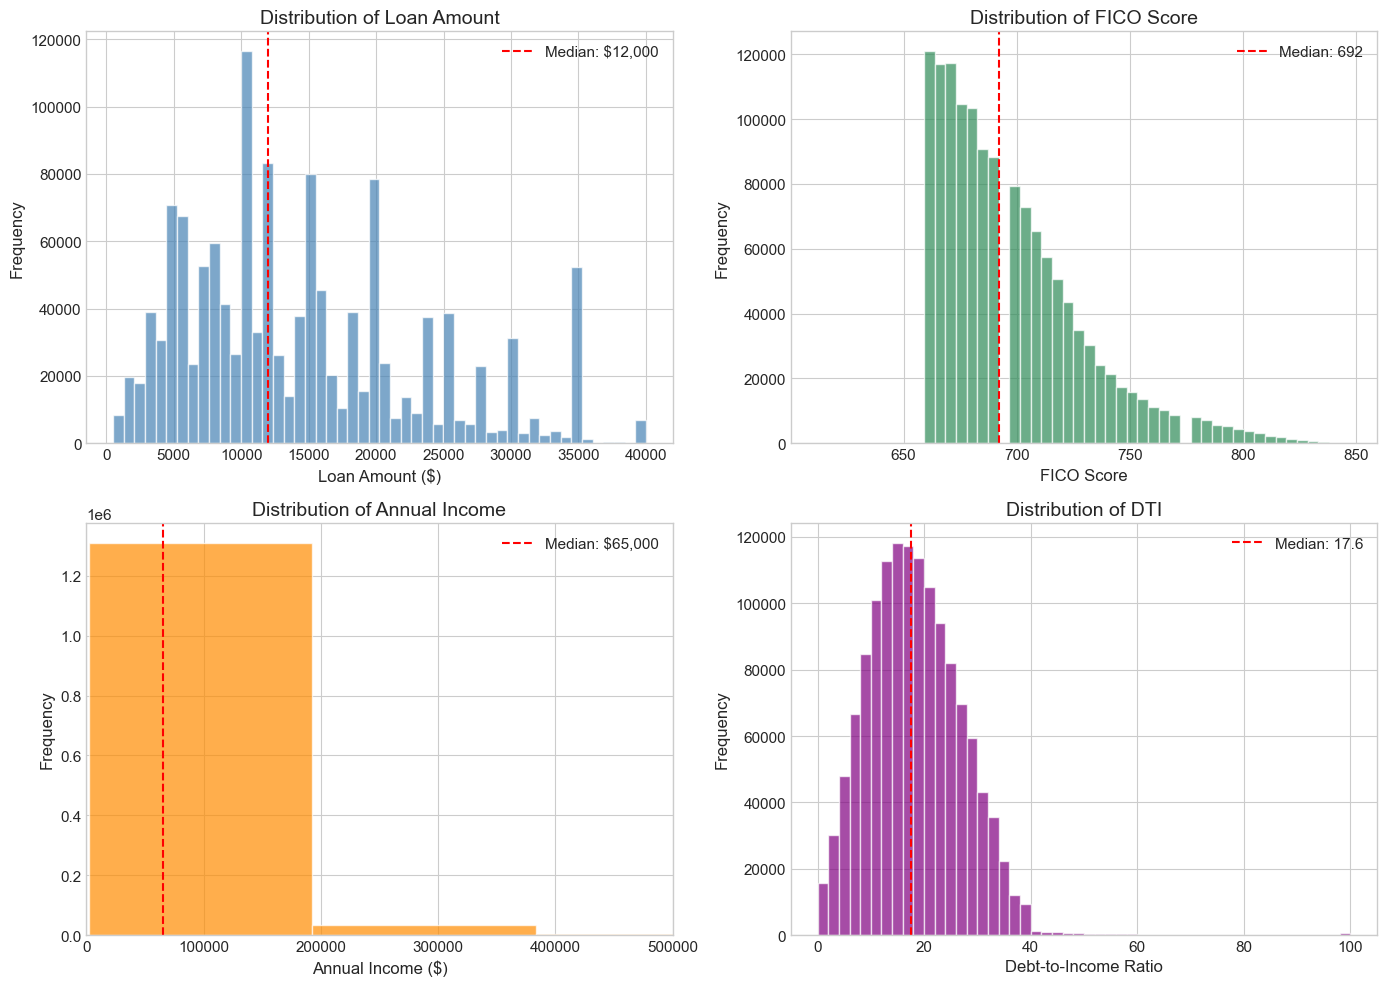

Figure saved to: outputs/figures/01_numeric_distributions.png


In [17]:
# Create distribution plots for key numeric variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loan Amount Distribution
ax1 = axes[0, 0]
df['loan_amnt'].hist(bins=50, ax=ax1, color='steelblue', edgecolor='white', alpha=0.7)
ax1.axvline(df['loan_amnt'].median(), color='red', linestyle='--', label=f'Median: ${df["loan_amnt"].median():,.0f}')
ax1.set_xlabel('Loan Amount ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Loan Amount')
ax1.legend()

# FICO Score Distribution
ax2 = axes[0, 1]
df['fico_n'].hist(bins=50, ax=ax2, color='seagreen', edgecolor='white', alpha=0.7)
ax2.axvline(df['fico_n'].median(), color='red', linestyle='--', label=f'Median: {df["fico_n"].median():.0f}')
ax2.set_xlabel('FICO Score')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of FICO Score')
ax2.legend()

# Income Distribution (log scale for better visualization)
ax3 = axes[1, 0]
df['revenue'].hist(bins=50, ax=ax3, color='darkorange', edgecolor='white', alpha=0.7)
ax3.axvline(df['revenue'].median(), color='red', linestyle='--', label=f'Median: ${df["revenue"].median():,.0f}')
ax3.set_xlabel('Annual Income ($)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Annual Income')
ax3.set_xlim(0, 500000)  # Focus on main distribution
ax3.legend()

# DTI Distribution
ax4 = axes[1, 1]
df['dti_n'].hist(bins=50, ax=ax4, color='purple', edgecolor='white', alpha=0.7)
ax4.axvline(df['dti_n'].median(), color='red', linestyle='--', label=f'Median: {df["dti_n"].median():.1f}')
ax4.set_xlabel('Debt-to-Income Ratio')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of DTI')
ax4.legend()

plt.tight_layout()
plt.savefig('../outputs/figures/01_numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Figure saved to: outputs/figures/01_numeric_distributions.png")

### 6.2 Default Rate Analysis

In [18]:
# Overall default statistics
print("OVERALL DEFAULT STATISTICS")
print("="*60)
print(f"Total Loans: {len(df):,}")
print(f"Total Defaults: {df['Default'].sum():,}")
print(f"Default Rate: {df['Default'].mean()*100:.2f}%")
print(f"Total Exposure: ${df['loan_amnt'].sum():,.0f}")
print(f"Defaulted Exposure: ${df[df['Default']==1]['loan_amnt'].sum():,.0f}")

OVERALL DEFAULT STATISTICS
Total Loans: 1,347,680
Total Defaults: 269,249
Default Rate: 19.98%
Total Exposure: $19,417,693,475
Defaulted Exposure: $4,186,020,700


In [19]:
# Default rate by FICO bucket
print("\nDefault Rate by FICO Score Bucket:")
print("="*60)

# Create FICO buckets
df['fico_bucket'] = pd.cut(df['fico_n'], 
                           bins=[300, 579, 619, 659, 699, 739, 779, 850],
                           labels=['300-579', '580-619', '620-659', '660-699', 
                                   '700-739', '740-779', '780-850'])

fico_default = df.groupby('fico_bucket', observed=True).agg(
    loan_count=('id', 'count'),
    default_count=('Default', 'sum'),
    default_rate=('Default', 'mean'),
    avg_loan_amnt=('loan_amnt', 'mean')
).round(4)

fico_default['default_rate_pct'] = fico_default['default_rate'] * 100
print(fico_default[['loan_count', 'default_count', 'default_rate_pct', 'avg_loan_amnt']])


Default Rate by FICO Score Bucket:
             loan_count  default_count  default_rate_pct  avg_loan_amnt
fico_bucket                                                            
580-619               3              1             33.33        2916.67
620-659             486            150             30.86        7249.38
660-699          822025         194006             23.60       13678.79
700-739          379874          61071             16.08       15643.57
740-779          106983          11303             10.57       15432.95
780-850           38309           2718              7.09       15040.93


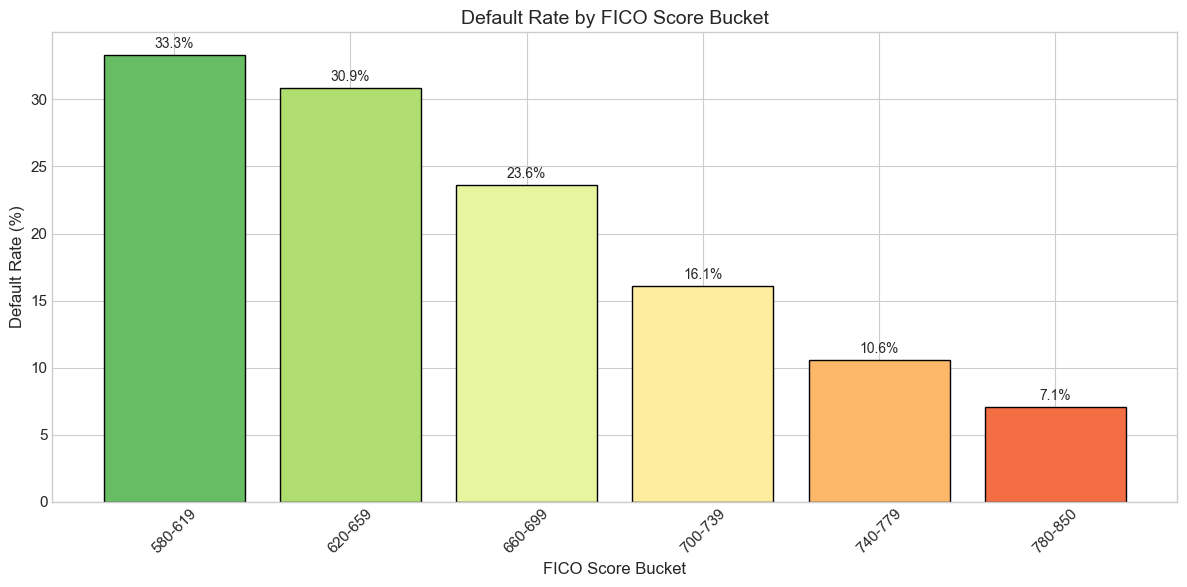

Figure saved to: outputs/figures/02_default_rate_by_fico.png


In [20]:
# Visualize default rate by FICO bucket
fig, ax = plt.subplots(figsize=(12, 6))

colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(fico_default)))
bars = ax.bar(range(len(fico_default)), fico_default['default_rate_pct'], color=colors, edgecolor='black')

ax.set_xticks(range(len(fico_default)))
ax.set_xticklabels(fico_default.index, rotation=45)
ax.set_xlabel('FICO Score Bucket')
ax.set_ylabel('Default Rate (%)')
ax.set_title('Default Rate by FICO Score Bucket')

# Add value labels
for bar, val in zip(bars, fico_default['default_rate_pct']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
            f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/02_default_rate_by_fico.png', dpi=300, bbox_inches='tight')
plt.show()
print("Figure saved to: outputs/figures/02_default_rate_by_fico.png")

In [21]:
# Default rate by loan purpose
print("\nDefault Rate by Loan Purpose:")
print("="*60)

purpose_default = df.groupby('purpose').agg(
    loan_count=('id', 'count'),
    default_count=('Default', 'sum'),
    default_rate=('Default', 'mean'),
    total_exposure=('loan_amnt', 'sum')
).sort_values('loan_count', ascending=False)

purpose_default['default_rate_pct'] = purpose_default['default_rate'] * 100
purpose_default['exposure_pct'] = purpose_default['total_exposure'] / purpose_default['total_exposure'].sum() * 100

print(purpose_default[['loan_count', 'default_rate_pct', 'exposure_pct']].head(15))


Default Rate by Loan Purpose:
                    loan_count  default_rate_pct  exposure_pct
purpose                                                       
debt_consolidation      781206             21.15         61.25
credit_card             295551             16.93         22.53
home_improvement         87684             17.76          6.38
other                    78263             21.08          3.95
major_purchase           29542             18.60          1.80
medical                  15606             21.84          0.72
small_business           15575             29.86          1.25
car                      14647             14.70          0.67
moving                    9520             23.41          0.39
vacation                  9083             19.19          0.29
house                     7294             21.91          0.58
wedding                   2350             12.43          0.13
renewable_energy           936             23.72          0.05
educational             

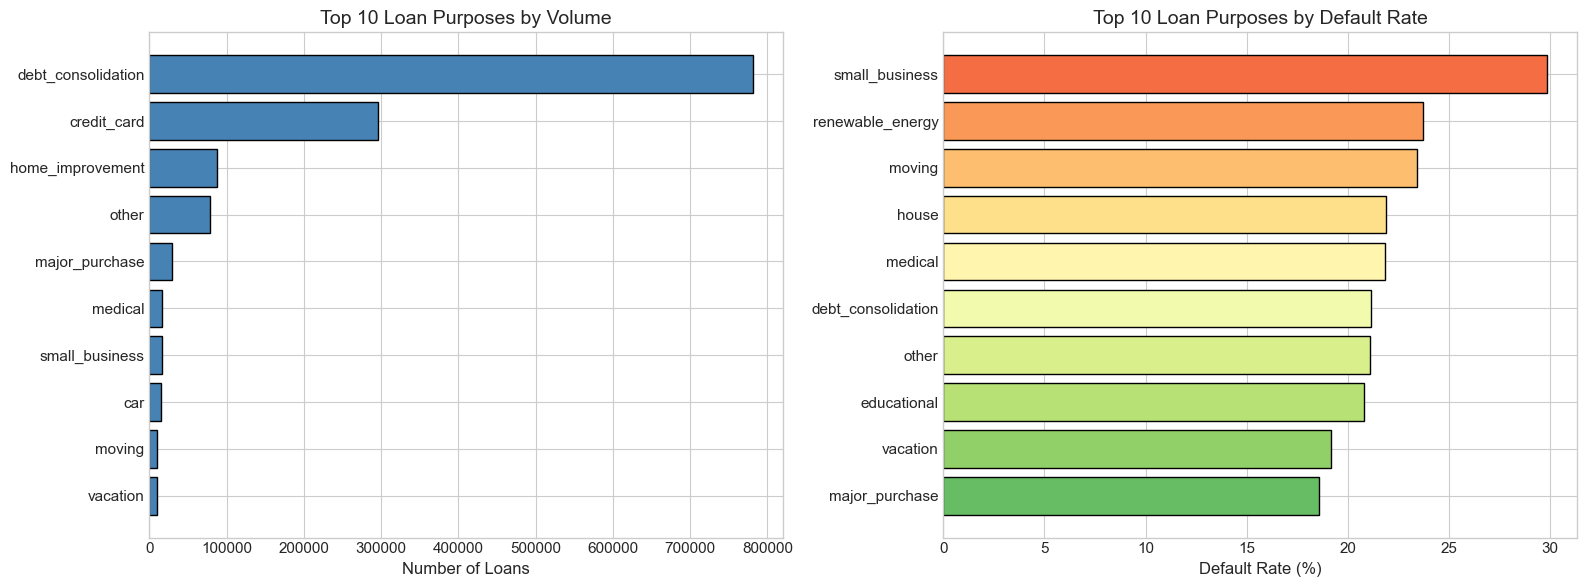

Figure saved to: outputs/figures/03_default_rate_by_purpose.png


In [22]:
# Visualize default rate by purpose
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Loan count by purpose
top_purposes = purpose_default.head(10)
ax1 = axes[0]
bars1 = ax1.barh(range(len(top_purposes)), top_purposes['loan_count'], color='steelblue', edgecolor='black')
ax1.set_yticks(range(len(top_purposes)))
ax1.set_yticklabels(top_purposes.index)
ax1.set_xlabel('Number of Loans')
ax1.set_title('Top 10 Loan Purposes by Volume')
ax1.invert_yaxis()

# Plot 2: Default rate by purpose
ax2 = axes[1]
purpose_by_default = purpose_default.sort_values('default_rate_pct', ascending=True).tail(10)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(purpose_by_default)))
bars2 = ax2.barh(range(len(purpose_by_default)), purpose_by_default['default_rate_pct'], color=colors, edgecolor='black')
ax2.set_yticks(range(len(purpose_by_default)))
ax2.set_yticklabels(purpose_by_default.index)
ax2.set_xlabel('Default Rate (%)')
ax2.set_title('Top 10 Loan Purposes by Default Rate')

plt.tight_layout()
plt.savefig('../outputs/figures/03_default_rate_by_purpose.png', dpi=300, bbox_inches='tight')
plt.show()
print("Figure saved to: outputs/figures/03_default_rate_by_purpose.png")

In [23]:
# Default rate by income bucket
print("\nDefault Rate by Income Bucket:")
print("="*60)

# Create income buckets
df['income_bucket'] = pd.cut(df['revenue'], 
                             bins=[0, 40000, 60000, 80000, 100000, 150000, 10000000],
                             labels=['<$40K', '$40K-$60K', '$60K-$80K', 
                                     '$80K-$100K', '$100K-$150K', '>$150K'])

income_default = df.groupby('income_bucket', observed=True).agg(
    loan_count=('id', 'count'),
    default_rate=('Default', 'mean'),
    avg_loan_amnt=('loan_amnt', 'mean')
)

income_default['default_rate_pct'] = income_default['default_rate'] * 100
print(income_default)


Default Rate by Income Bucket:
               loan_count  default_rate  avg_loan_amnt  default_rate_pct
income_bucket                                                           
<$40K              238033          0.23        8026.05             23.44
$40K-$60K          367299          0.22       11823.52             21.58
$60K-$80K          290870          0.20       14944.75             19.85
$80K-$100K         189269          0.18       17495.52             18.23
$100K-$150K        186423          0.16       19987.04             16.49
>$150K              75786          0.15       23488.23             14.81


In [24]:
# Default rate by state (top 15 states by volume)
print("\nDefault Rate by State (Top 15 by Volume):")
print("="*60)

state_default = df.groupby('addr_state').agg(
    loan_count=('id', 'count'),
    default_rate=('Default', 'mean'),
    total_exposure=('loan_amnt', 'sum')
).sort_values('loan_count', ascending=False)

state_default['default_rate_pct'] = state_default['default_rate'] * 100
print(state_default[['loan_count', 'default_rate_pct', 'total_exposure']].head(15))


Default Rate by State (Top 15 by Volume):
            loan_count  default_rate_pct  total_exposure
addr_state                                              
CA              196804             19.63      2886742675
TX              110307             19.84      1674091450
NY              110075             22.05      1573354275
FL               95815             21.50      1314572825
IL               51858             18.11       762927425
NJ               48576             21.12       736348875
PA               45640             20.82       640051250
OH               43935             20.52       600586475
GA               43470             18.43       633945675
VA               38107             19.95       583149550
NC               37812             20.79       536287125
MI               35302             20.31       486736100
AZ               32733             19.65       454925125
MD               31295             21.34       473138575
MA               31066             19.08     

In [25]:
# Default rate over time
print("\nDefault Rate by Issue Year:")
print("="*60)

year_default = df.groupby('issue_year').agg(
    loan_count=('id', 'count'),
    default_rate=('Default', 'mean'),
    total_exposure=('loan_amnt', 'sum')
)

year_default['default_rate_pct'] = year_default['default_rate'] * 100
print(year_default)


Default Rate by Issue Year:
            loan_count  default_rate  total_exposure  default_rate_pct
issue_year                                                            
2007               599          0.26         4952275             26.38
2008              2393          0.21        21119250             20.73
2009              5281          0.14        51928250             13.69
2010             12537          0.14       131992550             14.01
2011             21721          0.15       261683825             15.18
2012             53367          0.16       718411025             16.20
2013            134804          0.16      1982613000             15.60
2014            223102          0.18      3253477500             18.45
2015            375543          0.20      5498542450             20.18
2016            293057          0.23      4239696150             23.28
2017            169116          0.23      2418068150             23.13
2018             56160          0.16       83520

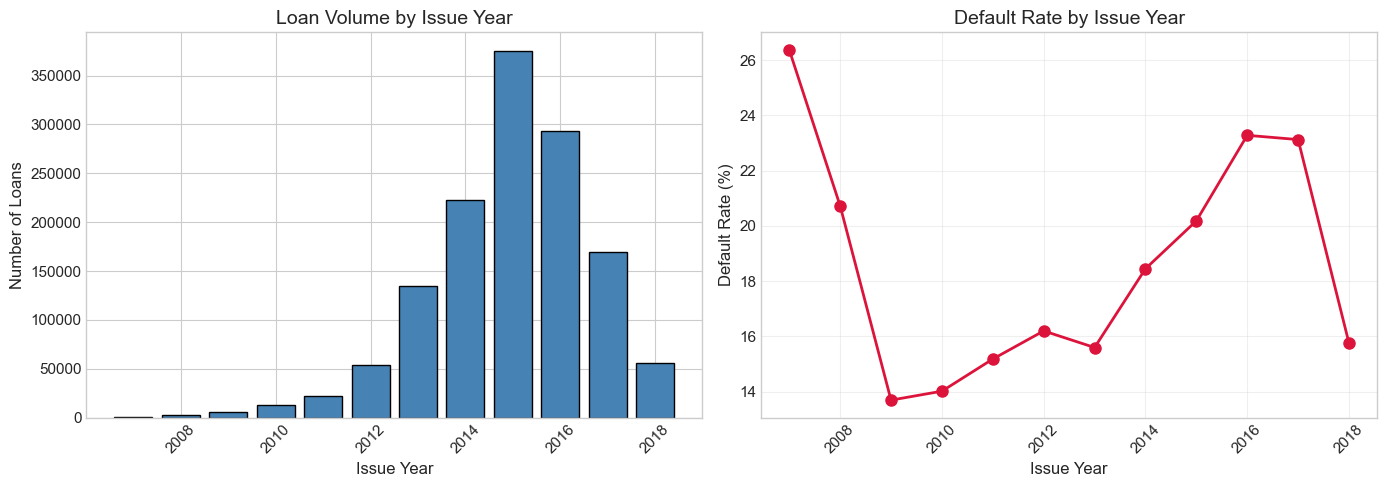

Figure saved to: outputs/figures/04_default_rate_over_time.png


In [26]:
# Visualize default rate over time
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loan volume by year
ax1 = axes[0]
ax1.bar(year_default.index, year_default['loan_count'], color='steelblue', edgecolor='black')
ax1.set_xlabel('Issue Year')
ax1.set_ylabel('Number of Loans')
ax1.set_title('Loan Volume by Issue Year')
ax1.tick_params(axis='x', rotation=45)

# Default rate by year
ax2 = axes[1]
ax2.plot(year_default.index, year_default['default_rate_pct'], marker='o', 
         linewidth=2, markersize=8, color='crimson')
ax2.set_xlabel('Issue Year')
ax2.set_ylabel('Default Rate (%)')
ax2.set_title('Default Rate by Issue Year')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/04_default_rate_over_time.png', dpi=300, bbox_inches='tight')
plt.show()
print("Figure saved to: outputs/figures/04_default_rate_over_time.png")

### 6.3 Correlation Analysis

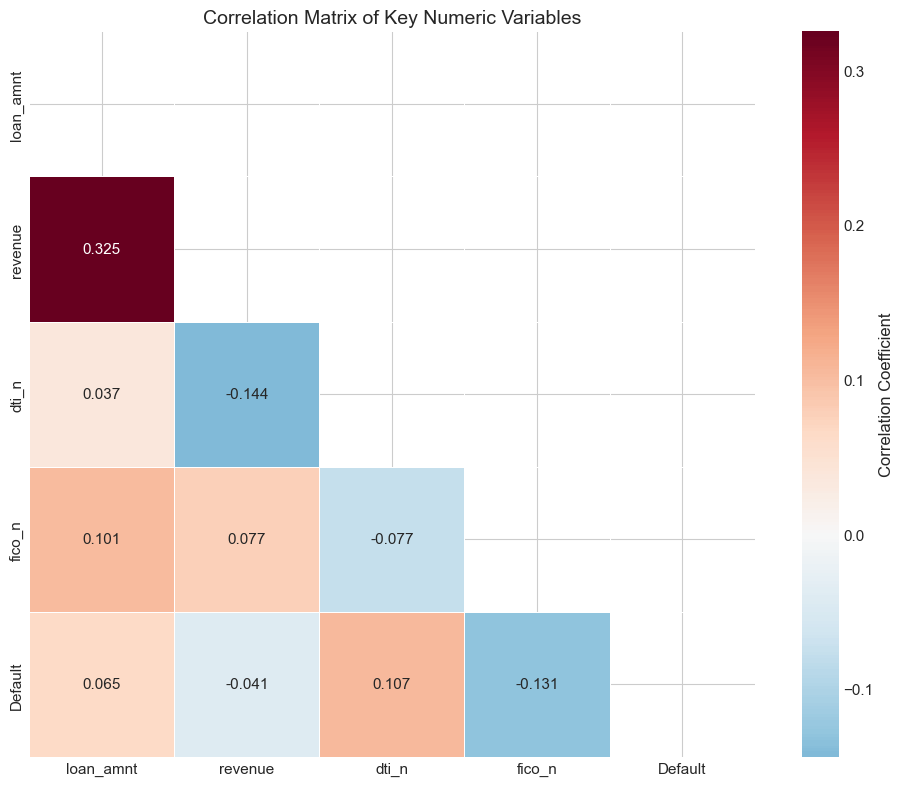

Figure saved to: outputs/figures/05_correlation_matrix.png


In [27]:
# Select numeric columns for correlation
numeric_cols = ['loan_amnt', 'revenue', 'dti_n', 'fico_n', 'Default']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix of Key Numeric Variables')

plt.tight_layout()
plt.savefig('../outputs/figures/05_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("Figure saved to: outputs/figures/05_correlation_matrix.png")

In [28]:
# Print correlations with Default
print("\nCorrelation with Default:")
print("="*60)
default_corr = corr_matrix['Default'].drop('Default').sort_values(key=abs, ascending=False)
for var, corr in default_corr.items():
    direction = "(+)" if corr > 0 else "(-)"
    print(f"  {var}: {corr:+.4f} {direction}")


Correlation with Default:
  fico_n: -0.1307 (-)
  dti_n: +0.1067 (+)
  loan_amnt: +0.0653 (+)
  revenue: -0.0406 (-)


### 6.4 Default vs Non-Default Comparison

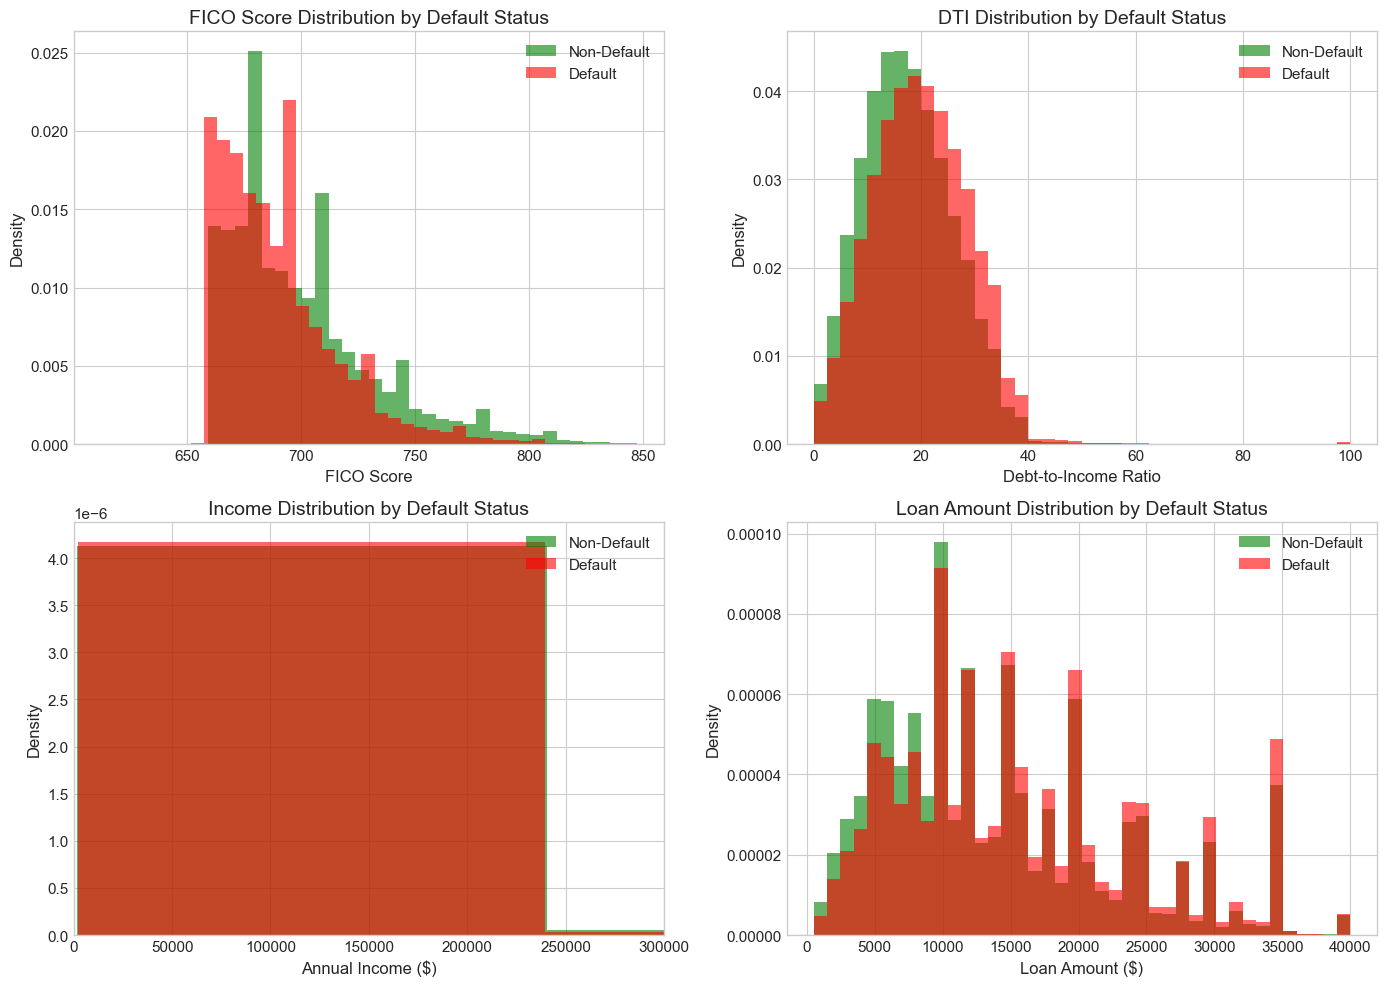

Figure saved to: outputs/figures/06_default_comparison.png


In [29]:
# Compare distributions: Default vs Non-Default
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# FICO Distribution by Default Status
ax1 = axes[0, 0]
df[df['Default']==0]['fico_n'].hist(bins=40, ax=ax1, alpha=0.6, label='Non-Default', color='green', density=True)
df[df['Default']==1]['fico_n'].hist(bins=40, ax=ax1, alpha=0.6, label='Default', color='red', density=True)
ax1.set_xlabel('FICO Score')
ax1.set_ylabel('Density')
ax1.set_title('FICO Score Distribution by Default Status')
ax1.legend()

# DTI Distribution by Default Status
ax2 = axes[0, 1]
df[df['Default']==0]['dti_n'].hist(bins=40, ax=ax2, alpha=0.6, label='Non-Default', color='green', density=True)
df[df['Default']==1]['dti_n'].hist(bins=40, ax=ax2, alpha=0.6, label='Default', color='red', density=True)
ax2.set_xlabel('Debt-to-Income Ratio')
ax2.set_ylabel('Density')
ax2.set_title('DTI Distribution by Default Status')
ax2.legend()

# Income Distribution by Default Status
ax3 = axes[1, 0]
df[df['Default']==0]['revenue'].hist(bins=40, ax=ax3, alpha=0.6, label='Non-Default', color='green', density=True)
df[df['Default']==1]['revenue'].hist(bins=40, ax=ax3, alpha=0.6, label='Default', color='red', density=True)
ax3.set_xlabel('Annual Income ($)')
ax3.set_ylabel('Density')
ax3.set_title('Income Distribution by Default Status')
ax3.set_xlim(0, 300000)
ax3.legend()

# Loan Amount Distribution by Default Status
ax4 = axes[1, 1]
df[df['Default']==0]['loan_amnt'].hist(bins=40, ax=ax4, alpha=0.6, label='Non-Default', color='green', density=True)
df[df['Default']==1]['loan_amnt'].hist(bins=40, ax=ax4, alpha=0.6, label='Default', color='red', density=True)
ax4.set_xlabel('Loan Amount ($)')
ax4.set_ylabel('Density')
ax4.set_title('Loan Amount Distribution by Default Status')
ax4.legend()

plt.tight_layout()
plt.savefig('../outputs/figures/06_default_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Figure saved to: outputs/figures/06_default_comparison.png")

In [30]:
# Statistical comparison
print("\nStatistical Comparison: Default vs Non-Default")
print("="*70)
print(f"{'Metric':<25} {'Non-Default':<20} {'Default':<20}")
print("-"*70)

for col in ['fico_n', 'dti_n', 'revenue', 'loan_amnt']:
    non_def_mean = df[df['Default']==0][col].mean()
    def_mean = df[df['Default']==1][col].mean()
    
    if col == 'revenue' or col == 'loan_amnt':
        print(f"{col:<25} ${non_def_mean:>15,.0f}    ${def_mean:>15,.0f}")
    else:
        print(f"{col:<25} {non_def_mean:>18.2f}    {def_mean:>18.2f}")


Statistical Comparison: Default vs Non-Default
Metric                    Non-Default          Default             
----------------------------------------------------------------------
fico_n                                700.24                689.83
dti_n                                  17.76                 20.12
revenue                   $         78,776    $         71,698
loan_amnt                 $         14,124    $         15,547


---
## 7. Save Cleaned Data

In [31]:
# Prepare final cleaned dataset
# Select columns to keep
columns_to_keep = [
    'id', 'issue_date', 'issue_year', 'issue_month',
    'loan_amnt', 'revenue', 'dti_n', 'fico_n',
    'emp_length', 'purpose', 'home_ownership_n', 'addr_state',
    'fico_bucket', 'income_bucket',
    'Default'
]

df_clean = df[columns_to_keep].copy()

print(f"Final cleaned dataset shape: {df_clean.shape}")
print(f"\nColumns in final dataset:")
for col in df_clean.columns:
    print(f"  - {col}")

Final cleaned dataset shape: (1347680, 15)

Columns in final dataset:
  - id
  - issue_date
  - issue_year
  - issue_month
  - loan_amnt
  - revenue
  - dti_n
  - fico_n
  - emp_length
  - purpose
  - home_ownership_n
  - addr_state
  - fico_bucket
  - income_bucket
  - Default


In [32]:
# Save cleaned data
OUTPUT_PATH = '../data_processed/loans_cleaned.csv'
df_clean.to_csv(OUTPUT_PATH, index=False)
print(f"\nCleaned data saved to: {OUTPUT_PATH}")
print(f"File size: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB (in memory)")


Cleaned data saved to: ../data_processed/loans_cleaned.csv
File size: 385.78 MB (in memory)


---
## 8. EDA Summary

### Key Findings

1. **Dataset Overview:**
   - Large dataset with 1M+ loans suitable for robust modeling
   - Minimal data quality issues after cleaning

2. **Default Rate Analysis:**
   - Overall default rate provides a baseline for PD modeling
   - Strong negative correlation between FICO score and default
   - Positive correlation between DTI and default
   - Certain loan purposes (small_business) show higher default rates

3. **Key Risk Drivers Identified:**
   - FICO score (strongest predictor)
   - Debt-to-income ratio
   - Loan purpose
   - Annual income

4. **Data Ready for Modeling:**
   - Clean dataset saved for subsequent analysis
   - Features prepared for PD model development

### Next Steps

1. Build agricultural portfolio segment (Notebook 02)
2. Develop PD models (Notebook 03)
3. Estimate LGD and EAD (Notebook 04)
4. Compute ECL (Notebook 05)
5. Stress testing (Notebook 06)

In [33]:
print("="*60)
print("NOTEBOOK 01 COMPLETE")
print("="*60)
print("\nData acquisition and EDA completed successfully.")
print("Cleaned data saved to: data_processed/loans_cleaned.csv")
print("Figures saved to: outputs/figures/")

NOTEBOOK 01 COMPLETE

Data acquisition and EDA completed successfully.
Cleaned data saved to: data_processed/loans_cleaned.csv
Figures saved to: outputs/figures/
